<p align="center">
  <strong>Fraudulent Transaction Prediction</strong>
</p>
<p align="center">
  <img src="https://github.com/Chetand777/Predicting-Fraudulent-Transaction/blob/main/image/cyber-thief-credit-card.jpg?raw=true" alt="Cyber Thief" width="400"/>
</p>

In [1]:
# Importing basic libraries for reading and visuaizing the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.lines as lines
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Reading the data
df = pd.read_csv('F:\Projects\Predicting-Fraudulent-Transaction\dataset\Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
# Checking the shape of dataset
df.shape

(6362620, 11)

<span style="color:green; font-size:16px; font-weight:bold;">There are 63,62,620 number of rows and 11 number of columns in dataset.</span>

In [4]:
# Checking general information about datatypes of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<span style="color:green; font-size:16px; font-weight:bold;">There are 5 features with float64 dtype, 3 features with int64 dtype and 3 features with object dtype in dataset.</span>

In [5]:
# Checking the statistical distribution of numerical features of the data
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<span style="color:green; font-size:16px; font-weight:bold;">The dataset exhibits a significant range in transaction amounts and balances. The high standard deviations and vast differences between the minimum and maximum values indicate substantial variability in transaction values and account balances. Most transactions have zero balances and no fraud detected, reflected by the median and 75th percentile values of fraud-related columns. The low mean of the isFraud column (0.13%) suggests that fraudulent transactions are rare in this dataset.</span>

In [6]:
# Checking for nulls in dataset
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<span style="color:green; font-size:16px; font-weight:bold;">There are no nulls present in each column.</span>

In [7]:
# Converting type column from object to int dtype and dropping other 2 object dtypes columns and fraud related columns coz most of the entries are zero
df1 = df.copy(deep=True)
df1['type'] = df1['type'].map({'PAYMENT': 1, 'TRANSFER': 2, 'CASH_OUT': 3, 'DEBIT': 4, 'CASH_IN': 5})
df1 = df1.drop(columns=['nameOrig', 'nameDest', 'isFraud', 'isFlaggedFraud'], axis=1)
df1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,1,9839.64,170136.0,160296.36,0.0,0.0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0
2,1,2,181.00,181.0,0.00,0.0,0.0
3,1,3,181.00,181.0,0.00,21182.0,0.0
4,1,1,11668.14,41554.0,29885.86,0.0,0.0


In [8]:
# Checking multicollinearity between variables using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['feature'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]
vif

,feature,VIF
0,step,2.466060
1,type,3.251976
2,amount,4.129854
3,oldbalanceOrg,501.282300
4,newbalanceOrig,508.906801
5,oldbalanceDest,73.377939
6,newbalanceDest,84.656570


<span style="color:green; font-size:16px; font-weight:bold;">The VIF values suggest the presence of multicollinearity in the dataset. Notably, oldbalanceOrg (VIF ≈ 501.28) and newbalanceOrig (VIF ≈ 508.91) have extremely high VIF values, indicating a strong multicollinearity issue. oldbalanceDest and newbalanceDest also have high VIF values (73.38 and 84.66, respectively). Multicollinearity can distort the statistical significance of predictors in a model. Consider removing or combining highly collinear features. For instance, the high VIFs for oldbalanceOrg and newbalanceOrig suggest they are closely related, so one of them might be removed or a new feature combining both might be created. Similarly, assess oldbalanceDest and newbalanceDest for potential removal or transformation.</span>

In [9]:
# Lets see the types of transactions that are considered as fraud
print('Type of transactions which are fraud: {}'.format(list(df.loc[df.isFraud == 1].type.drop_duplicates().values)))

Type of transactions which are fraud: ['TRANSFER', 'CASH_OUT']


<span style="color:green; font-size:16px; font-weight:bold;">We can see that there are 2 types of transactions which are considered as fraud i.e.'TRANSFER', 'CASH_OUT'.</span>

In [10]:
# Now lets check how many transactions from these 2 types are fraudulent
fraud_transfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
fraud_cashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]

print('Number of fraudulent TRANSFER transactions: {}'.format(len(fraud_transfer)))

print('Number of fraudulent CASH_OUT transactions: {}'.format(len(fraud_cashout)))

Number of fraudulent TRANSFER transactions: 4097
Number of fraudulent CASH_OUT transactions: 4116


In [11]:
# Checking the isFlaggedFraud column

df.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

<span style="color:green; font-size:16px; font-weight:bold;">The isFlaggedFraud column is highly imbalanced, with the vast majority of transactions (6,362,604) being non-fraudulent (0) and only 16 being flagged as fraudulent (1). This extreme imbalance can lead to poor model performance, as the model may become biased towards predicting non-fraudulent transactions. Use oversampling (e.g., SMOTE) for the minority class or undersampling for the majority class. Focus on metrics like precision, recall, and the F1 score rather than accuracy to better assess model performance on the minority class.</span>

In [12]:
# Checking the variables oldbalanceDest & newbalanceDest
print('Number of recipients having old & new balance before and after transaction is zero : {}'.format(len(df.loc[(df.oldbalanceDest == 0) & (df.newbalanceDest == 0)].nameDest.values)))

Number of recipients having old & new balance before and after transaction is zero : 2317282


<span style="color:green; font-size:16px; font-weight:bold;">We can see that as multiple newbalanceDest and oldbalanceDest have zero values because the transaction is put on hold & there are no information available for merchants..</span>

In [13]:
# Similarly we can see the oldbalanceOrg & newbalanceOrig variables
zero_balance = list(df.loc[(df.oldbalanceOrg == 0) & (df.newbalanceOrig == 0) & (df.amount != 0)].type.values)
print('Number of transactions where oldbalanceOrg & newbalanceOrig are 0 but amount of transaction is not : {}'.format(len(zero_balance)))

Number of transactions where oldbalanceOrg & newbalanceOrig are 0 but amount of transaction is not : 2088969


<span style="color:green; font-size:16px; font-weight:bold;">There are 2,088,969 transactions where both oldbalanceOrg and newbalanceOrig are 0, but the amount is not zero. This suggests that there might be issues or anomalies in these records, potentially indicating incorrect data entry or transactions that require special attention.</span>

In [14]:
# Checking the Merchant accounts in destination var nameDest as there is no information for those customers 
print('Number of Merchants accounts in destination var where transaction type is TRANSFER : {}'.format(df.loc[(df.type == 'TRANSFER')].nameDest.str.contains('M').any()))
print('Number of Merchants accounts in destination var where transaction type is CASH_OUT : {}'.format(df.loc[(df.type == 'CASH_OUT')].nameDest.str.contains('M').any()))

Number of Merchants accounts in destination var where transaction type is TRANSFER : False
Number of Merchants accounts in destination var where transaction type is CASH_OUT : False


<span style="color:green; font-size:16px; font-weight:bold;">There are no Merchant accounts through which Fraud transaction is happened so missing information does not affect while building model.</span>

In [15]:
# Lets split the feature and target var manually
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]
y = X.isFraud
X = X.drop(columns=['nameOrig', 'nameDest', 'isFraud', 'isFlaggedFraud'], axis=1)
X['type'] = X['type'].map({'TRANSFER': 1, 'CASH_OUT': 2})
print(X.shape)
print(y.shape)

(2770409, 7)
(2770409,)


<span style="color:green; font-size:16px; font-weight:bold;">How did you select variables to be included in the model?</span>
</br>
</br>
<span style="color:green; font-size:16px; font-weight:bold;">We know that fraud is only occured in 'TRANSFER' and 'CASH_OUT' transaction types. So, we choose only those type of payment and we removed Variables [ nameorig , namedest , isFlaggedFraud ].</span>

In [16]:
# Now, replace missing values (flag anomelies) from old and new balance of originator and destination where amount in not 0
X.loc[(X.oldbalanceDest == 0) & (X.newbalanceDest == 0) & (X.amount != 0), ['oldbalanceDest', 'newbalanceDest']] = -1
X.loc[(X.oldbalanceOrg == 0) & (X.newbalanceOrig == 0) & (X.amount != 0), ['oldbalanceOrg', 'newbalanceOrig']] = 0

<span style="color:green; font-size:16px; font-weight:bold;">Imputation of -1: For transactions where both oldbalanceDest and newbalanceDest are 0, but the amount is not zero, setting these balances to -1 helps distinguish these records as potentially anomalous or special cases.
Imputation of 0: For transactions where both oldbalanceOrig and newbalanceOrig are 0, but the amount is not zero, setting these balances to 0 standardizes these anomalies. Improving the model's ability to identify and learn from patterns in the data by explicitly marking anomalies.</span>

In [17]:
# Adding 2 new columns as errors in feature var 
X['errorbalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorbalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorbalanceOrig,errorbalanceDest
2,1,1,181.00,181.0,0.0,-1.0,-1.00,0.00,181.0
3,1,2,181.00,181.0,0.0,21182.0,0.00,0.00,21363.0
15,1,2,229133.94,15325.0,0.0,5083.0,51513.44,213808.94,182703.5
19,1,1,215310.30,705.0,0.0,22425.0,0.00,214605.30,237735.3
24,1,1,311685.89,10835.0,0.0,6267.0,2719172.89,300850.89,-2401220.0


<span style="color:green; font-size:16px; font-weight:bold;">We created two features of error at origin and destination account, where non zero amount is transfer but oldbalance and new balance have zero value</span>

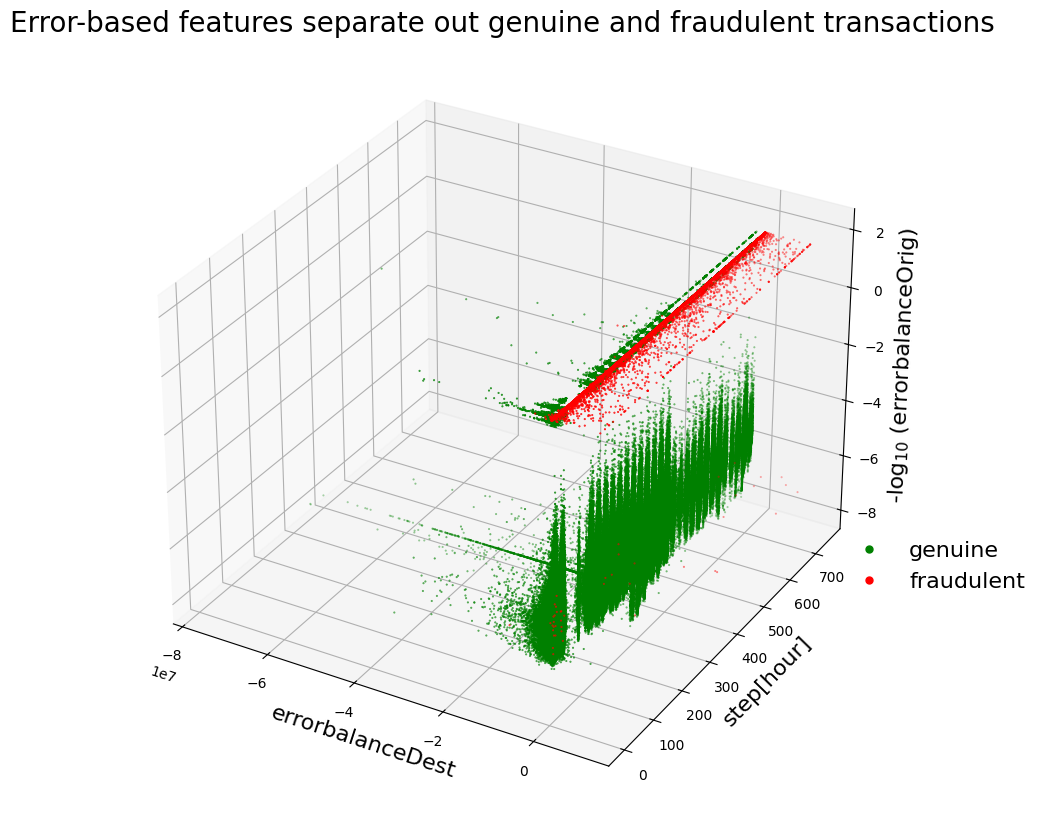

In [18]:
# Visualizing the data distribution using 3D plot
x1 = 'errorbalanceDest'
y1 = 'step'
z1 = 'errorbalanceOrig'
Z_offset = 0.02
limit = len(X)

sns.reset_orig

fig = plt.figure(figsize=(10, 12))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.loc[(y == 0, x1)][:limit], X.loc[(y == 0, y1)][:limit], -np.log10(X.loc[y == 0, z1][:limit] + Z_offset), c='g', marker='.', s=1, label='genuine')

ax.scatter(X.loc[(y == 1, x1)][:limit], X.loc[(y == 1, y1)][:limit], -np.log10(X.loc[y == 1, z1][:limit] + Z_offset), c='r', marker='.', s=1, label='fraudulent')

ax.set_xlabel(x1, size=16)
ax.set_ylabel(y1 + '[hour]', size=16)
ax.set_zlabel('-log$_{10}$ ('+ z1 +')', size=16)
ax.set_title('Error-based features separate out genuine and fraudulent transactions', size=20)

plt.axis('tight')

ax.grid(1)

genuine_marker = lines.Line2D([], [], linewidth=0, color='g', marker='.', markersize=10, label='genuine')

fraud_marker = lines.Line2D([], [], linewidth=0, color='r', marker='.', markersize=10, label='fraudulent')

plt.legend(handles=[genuine_marker, fraud_marker], bbox_to_anchor=(1.20, 0.38), frameon=False, prop={'size': 16})

plt.show()

<span style="color:green; font-size:16px; font-weight:bold;">This 3D scatter plot visualizes the distribution of genuine and fraudulent transactions based on three features: errorbalanceDest, step, and errorbalanceOrig (transformed using a logarithmic scale).</span>
</br>
</br>
<span style="color:green; font-size:16px; font-weight:bold;">Fraudulent transactions (red) tend to have higher values of errorbalanceOrig and errorbalanceDest, as indicated by the vertical spread of red points.Genuine transactions (green) are more densely packed towards the lower values of these error balances.</span>
</br>
</br>
<span style="color:green; font-size:16px; font-weight:bold;">The error-based features errorbalanceDest and errorbalanceOrig, especially when transformed logarithmically, are useful in distinguishing fraudulent transactions from genuine ones. The distinct clustering of red and green points confirms that these features provide a strong signal for identifying fraud.</span>

In [19]:
# Checking the imbalance in new features
Xgenuine = X.loc[(y == 0)]
Xfraud = X.loc[(y == 1)]

print(f'Genuine :{len(Xgenuine)}')
print(f'Fraud : {len(Xfraud)}')

Genuine :2762196
Fraud : 8213


In [20]:
# Spliting the features and target using train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_Train : {X_train.shape}')
print(f'X_Test : {X_test.shape}')
print(f'y_Train : {y_train.shape}')
print(f'y_Test : {y_test.shape}')

X_Train : (2216327, 9)
X_Test : (554082, 9)
y_Train : (2216327,)
y_Test : (554082,)


AUPRC: 0.9940520107192888


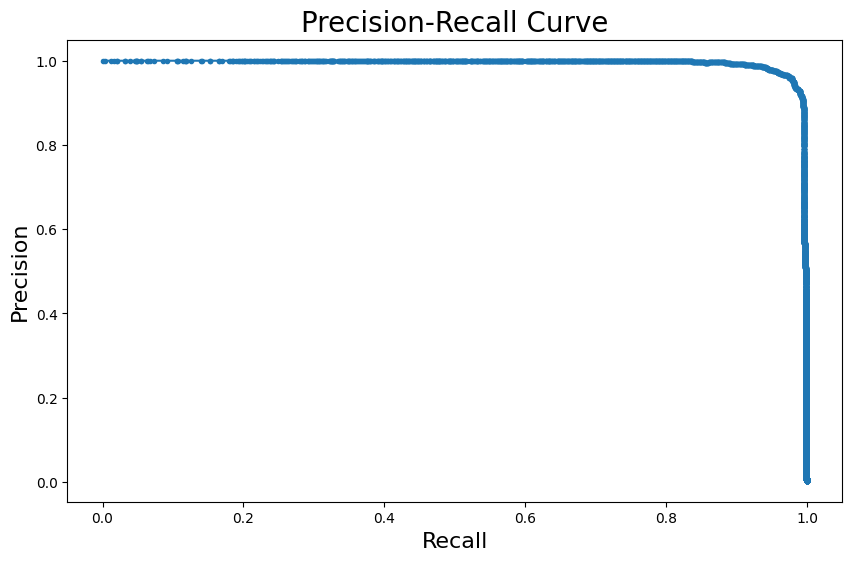

<Figure size 1200x800 with 0 Axes>

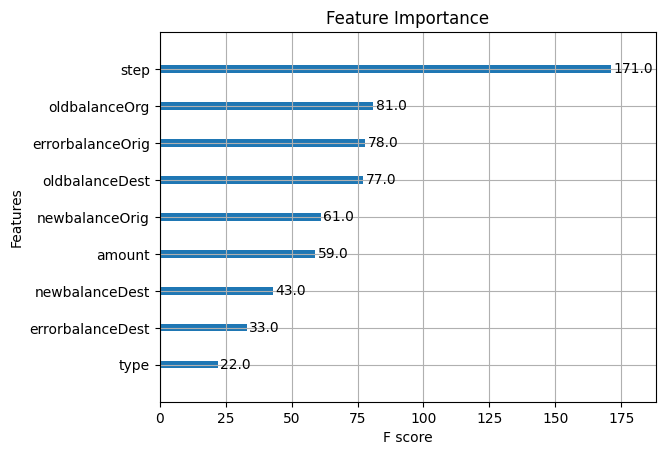

<Figure size 2000x1000 with 0 Axes>

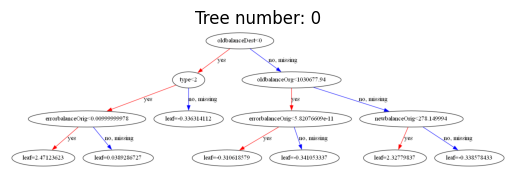

<Figure size 2000x1000 with 0 Axes>

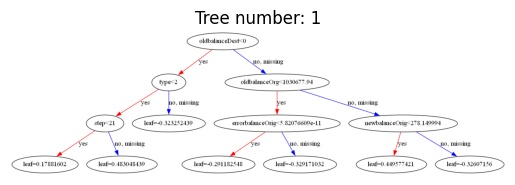

<Figure size 2000x1000 with 0 Axes>

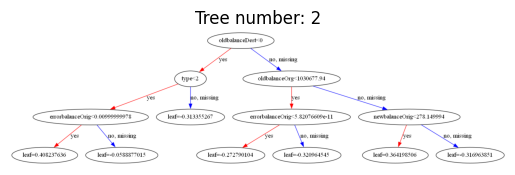

<Figure size 2000x1000 with 0 Axes>

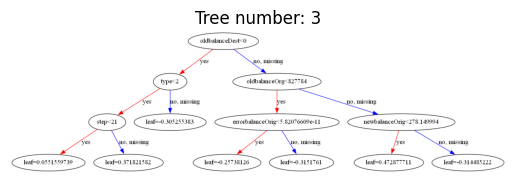

<Figure size 2000x1000 with 0 Axes>

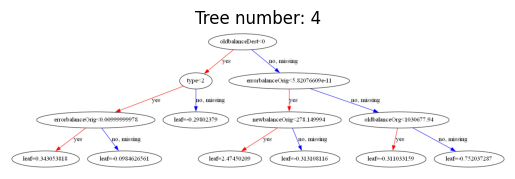

<Figure size 2000x1000 with 0 Axes>

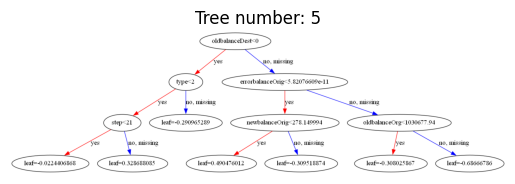

In [21]:
# Building XGBClassifier ensemle model
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import average_precision_score, precision_recall_curve
from xgboost import plot_importance, plot_tree
import graphviz

wts = (y == 0).sum() / (1.0*(y == 1).sum())
xgb = XGBClassifier(max_depth=3, scal_pos_wt=wts, n_jobs=4, n_estimators=100)
probabilities = xgb.fit(X_train, y_train).predict_proba(X_test)
print(f'AUPRC: {average_precision_score(y_test, probabilities[:, 1])}')


# Plot the precision recall curve
precision, recall, _ = precision_recall_curve(y_test, probabilities[:, 1])
plt.figure(figsize=[10,6])
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('Precision-Recall Curve', fontsize=20)
plt.show()


# Plot feature importance
plt.figure(figsize=(12, 8))
plot_importance(xgb)
plt.title('Feature Importance')
plt.show()


# Determine the number of trees to visualize
selected_trees = [0, 1, 2, 3, 4, 5]

# Visualize each tree using plot_tree
for i in range(len(selected_trees)):
    plt.figure(figsize=(20, 10))
    plot_tree(xgb, num_trees=i)
    plt.title(f'Tree number: {i}')
    plt.show()


<span style="color:green; font-size:16px; font-weight:bold;">Describe your fraud detection model in elaboration.</span>
</br>
</br>
<span style="color:green; font-size:16px; font-weight:bold;">When tackling imbalanced data, it's tempting to discard the majority class, but this can lead to poor performance on real-world skewed test data. Instead, oversampling the minority class, like using SMOTE, is often more effective. However, after trying various anomaly detection and supervised learning methods, I found that the best results came from using an ensemble of decision trees, particularly XGBoost, on the original dataset. XGBoost naturally handles imbalanced data, missing values, and can be speed up through parallel processing. What's more, it allows for weighting the positive class, making it ideal for fraud detection where the positive class represents fraudulent transactions.</span>

<span style="color:green; font-size:16px; font-weight:bold;">Demonstrate the performance of the model by using best set of tools.</span>
</br>
</br>
<span style="color:green; font-size:16px; font-weight:bold;">To effectively gauge model performance on highly skewed data, I utilize the area under the precision-recall curve (AUPRC) instead of the conventional AUROC. With a dataset comprising 99% negative and 1% positive examples, AUPRC focuses on how well the model handles the rare positive instances. A high AUPRC indicates strong performance in detecting these positive examples, while a low AUPRC suggests poor performance in identifying them. This metric helps us assess the model's effectiveness in scenarios such as fraud detection, where accurately detecting the minority positive cases is crucial.</span>

<span style="color:green; font-size:16px; font-weight:bold;">What kind of prevention should be adopted while company update its infrastructure?</span>
</br>
</br>
<span style="color:green; font-size:16px; font-weight:bold;">Company can prevent fraudulent transaction by focusing more on payment method type - 'Transfer' & 'Cash_out'</span>

<span style="color:green; font-size:16px; font-weight:bold;">Assuming these actions have been implemented, how would you determine if they work?</span>
</br>
</br>
<span style="color:green; font-size:16px; font-weight:bold;">We can retrain & maintain model after certain intervals so our model perform best under various fraudlant transaction.</span>